### FASTER FOM

Post-cut FOM just to allow for the easy load in of one already resolved dataset, rather than having to do the cuts each time (annoying).

In [2]:
import sys,os,os.path

sys.path.append("../../../")   # cite IC from parent directory
                            # NOTE if you can't import IC stuff, its because of the
                            # above line
#sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['ICTDIR']='/home/e78368jw/Documents/NEXT_CODE/IC'

import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np
import tables as tb
import IC.invisible_cities.io.dst_io                           as     dstio
import IC.invisible_cities.io.mcinfo_io as mcio
from    IC.invisible_cities.core.core_functions   import shift_to_bin_centers
import iminuit,probfit

import scipy.special as special
from scipy.stats import skewnorm
from scipy.optimize import curve_fit

from scipy.integrate import quad

from next_misc.Tl_studies.functions import isaura_analyse as isa

In [3]:
# read in data
p1_data = pd.read_hdf('../quick_notebooks/cut_data/23_01_P1A_10x10x10.h5')
display(p1_data)

mc_data = pd.read_hdf('../quick_notebooks/cut_data/MC_23_01_P1A_10x10x10.h5')
display(mc_data)

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
30,5080036,0,1.596255,148.370606,57,11566,1,-98.325,308.675,260.970490,...,268.816186,-21.808474,407.837090,304.031722,0.682742,0.479417,0.0,14.166667,14.444444,12.045174
115,5080188,0,1.596243,135.904646,51,11926,1,156.675,107.675,734.490601,...,787.160369,246.035796,183.579923,740.719076,0.574430,0.397806,0.0,14.285714,14.000000,13.429004
320,5080496,0,1.594183,149.721509,60,12933,1,147.675,-166.325,322.920868,...,348.228080,153.085963,-124.132459,333.285062,0.456853,0.451467,0.0,14.300000,13.142857,13.105713
323,5080500,0,1.589982,205.359168,82,13395,1,-113.325,177.675,833.210754,...,839.223051,-65.638573,352.948549,859.177343,0.586061,0.246951,0.0,13.600000,14.307692,11.789322
331,5080512,0,1.598140,93.397310,40,13495,1,199.675,202.675,571.753174,...,581.635714,245.519546,214.330517,620.986981,0.702968,0.280580,0.0,14.000000,13.166667,14.151962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123588,4060532,0,1.592890,141.856792,68,12089,1,101.675,-359.325,833.190979,...,905.687916,120.576858,-264.555179,889.923837,0.086989,0.069762,0.0,13.666667,15.000000,13.189052
123593,4060546,0,1.595968,407.877953,84,10670,1,207.675,39.675,414.230682,...,600.959855,430.035414,48.042708,468.395088,0.202174,0.018846,0.0,14.941176,14.500000,14.777027
123596,4060550,0,1.624295,241.783804,97,11829,1,-46.325,-180.325,533.926270,...,717.327925,-0.542401,-159.900302,535.616629,0.439025,0.052087,0.0,13.714286,13.200000,14.534382
123620,4060606,0,1.594137,83.557401,51,14236,1,66.675,-1.325,499.301849,...,522.748218,134.966015,48.550782,506.152439,0.391017,0.156083,0.0,13.333333,14.750000,12.850258


,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
1340,5080036,1,Tl208,True,0,395.591492,394.606506,531.592651,0.000000,395.591492,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,none,RadioactiveDecay
1341,5080036,4,e-,False,1,395.591492,394.606506,531.592651,0.000244,411.479492,...,0.353658,0.542898,0.496048,0.000000,-0.000000,-0.000000,0.451808,28.007418,RadioactiveDecay,eIoni
1342,5080036,3,anti_nu_e,False,1,395.591492,394.606506,531.592651,0.000244,-12500.000000,...,-0.975601,-0.153678,0.416833,-0.975601,-0.153678,0.416833,1.071991,14169.677734,RadioactiveDecay,Transportation
1343,5080036,2,Pb208[3475.078],False,1,395.591492,394.606506,531.592651,0.000244,395.591492,...,0.621942,-0.389220,-0.912880,0.000000,-0.000000,-0.000000,0.000004,0.000000,RadioactiveDecay,RadioactiveDecay
1344,5080036,6,gamma,False,2,395.591492,394.606506,531.592651,0.000244,-559.946899,...,-0.727012,-0.457868,-0.048611,-0.000000,-0.000000,0.000000,0.860554,1237.814819,RadioactiveDecay,phot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8037523,4060608,75,e-,False,72,104.978249,390.607910,469.031830,1.478323,104.979515,...,0.028556,-0.007457,0.005912,0.000000,-0.000000,0.000000,0.000886,0.005419,phot,eIoni
8037524,4060608,71,e-,False,37,123.162987,364.340912,459.579254,1.218727,122.768005,...,-0.219102,0.074105,-0.038592,0.000000,0.000000,0.000000,0.051235,2.564043,eIoni,eIoni
8037525,4060608,70,e-,False,37,131.929123,355.118439,451.361572,1.152341,130.297546,...,-0.087984,0.296942,0.020893,-0.000000,0.000000,0.000000,0.086891,7.800103,eIoni,eIoni
8037526,4060608,69,e-,False,37,168.040802,365.384857,418.709412,0.868248,168.268768,...,0.097592,-0.146665,-0.040216,0.000000,0.000000,-0.000000,0.031009,1.470636,eIoni,eIoni


### scrape positron info from MC, then do true FOM calc

In [4]:
mc_pos = isa.positron_scraper(mc_data)

In [5]:
display(mc_pos)
print(mc_pos['event_id'].nunique())

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
1375,5080036,37,e+,False,35,-65.955795,324.198029,272.437469,1.781441,-22.099428,...,-1.258216,-0.110806,-0.581811,0.0,-0.0,0.0,0.970557,263.940033,conv,annihil
7122,5080188,23,e+,False,21,241.184113,194.943420,758.190796,1.125227,168.503784,...,-0.683127,-1.027449,0.742320,0.0,-0.0,-0.0,1.016899,180.321533,conv,annihil
19381,5080496,27,e+,False,25,215.731705,-146.473297,350.598602,2.004893,158.373383,...,-0.510435,-0.981552,-0.062088,-0.0,-0.0,-0.0,0.709232,209.478363,conv,annihil
19512,5080500,22,e+,False,20,-47.140430,322.156067,868.043457,1.866523,8.660159,...,-1.144746,-0.332314,0.786665,0.0,-0.0,0.0,1.005853,309.103363,conv,annihil
20070,5080512,29,e+,False,27,259.946320,243.045319,593.570312,0.717534,230.144669,...,-0.688200,-0.688891,0.129937,0.0,-0.0,-0.0,0.596338,132.169708,conv,annihil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8031981,4060472,33,e+,False,31,152.282867,119.753876,253.005630,1.551216,107.279686,...,-0.822312,-0.580125,-0.709536,0.0,-0.0,0.0,0.822156,248.743088,conv,annihil
8032926,4060498,25,e+,False,23,91.774078,-142.231888,572.563171,2.076683,28.969473,...,-0.484107,-0.897027,0.547758,-0.0,-0.0,0.0,0.753982,199.098312,conv,annihil
8034832,4060546,41,e+,False,39,254.179504,211.746368,597.566040,0.804710,253.911621,...,-0.147771,-0.118004,0.027212,0.0,0.0,0.0,0.034548,1.678436,conv,annihil
8037358,4060606,39,e+,False,37,136.485687,54.518787,504.019226,1.433447,82.499695,...,-0.430029,-0.882541,-0.276713,-0.0,-0.0,-0.0,0.629831,140.283585,conv,annihil


1888


### make positron and non-positron dfs from simdata

In [6]:
pos_data = p1_data[p1_data['event'].isin(mc_pos['event_id'])]

no_pos_data = p1_data[~p1_data['event'].isin(mc_pos['event_id'])]

# CHECK: are all the events in these two lists?
print(no_pos_data['event'].nunique() + pos_data['event'].nunique() == p1_data['event'].nunique())

True


In [7]:
display(pos_data)

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
30,5080036,0,1.596255,148.370606,57,11566,1,-98.325,308.675,260.970490,...,268.816186,-21.808474,407.837090,304.031722,0.682742,0.479417,0.0,14.166667,14.444444,12.045174
115,5080188,0,1.596243,135.904646,51,11926,1,156.675,107.675,734.490601,...,787.160369,246.035796,183.579923,740.719076,0.574430,0.397806,0.0,14.285714,14.000000,13.429004
320,5080496,0,1.594183,149.721509,60,12933,1,147.675,-166.325,322.920868,...,348.228080,153.085963,-124.132459,333.285062,0.456853,0.451467,0.0,14.300000,13.142857,13.105713
323,5080500,0,1.589982,205.359168,82,13395,1,-113.325,177.675,833.210754,...,839.223051,-65.638573,352.948549,859.177343,0.586061,0.246951,0.0,13.600000,14.307692,11.789322
331,5080512,0,1.598140,93.397310,40,13495,1,199.675,202.675,571.753174,...,581.635714,245.519546,214.330517,620.986981,0.702968,0.280580,0.0,14.000000,13.166667,14.151962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123561,4060472,0,1.595625,97.386820,72,12609,1,85.675,84.675,180.127869,...,190.199712,109.407867,95.179458,237.582994,0.449053,0.314470,0.0,12.666667,13.500000,13.453562
123574,4060498,0,1.590435,165.408490,70,11704,1,17.675,-233.325,486.703430,...,491.669078,43.578905,-222.524993,534.285555,0.474668,0.213295,0.0,13.857143,13.250000,13.339870
123593,4060546,0,1.595968,407.877953,84,10670,1,207.675,39.675,414.230682,...,600.959855,430.035414,48.042708,468.395088,0.202174,0.018846,0.0,14.941176,14.500000,14.777027
123620,4060606,0,1.594137,83.557401,51,14236,1,66.675,-1.325,499.301849,...,522.748218,134.966015,48.550782,506.152439,0.391017,0.156083,0.0,13.333333,14.750000,12.850258


### Produce FOM

In [8]:
cut_list = np.linspace(0, 0.48, 25, endpoint = True)
print(cut_list)

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48]


In [9]:
# collect fom
fom = isa.true_fom_calc(pos_data, no_pos_data, cut_list)

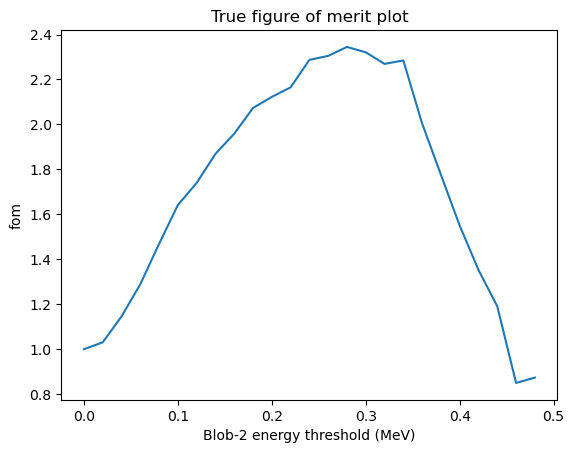

In [10]:
# plot fom
plt.plot(cut_list, fom)
plt.title("True figure of merit plot")
plt.xlabel("Blob-2 energy threshold (MeV)")
plt.ylabel("fom")
plt.show()

### So the basic structure works. Lets set up a little function to do this for 'NEXUS_DATA, PORT_DATA, CUT_LIST'

In [11]:
def fom_producer(nexus_path, isaura_path, cut_list, verbose = False):
    '''
    Takes the path of the relevant **pre-cut** data for nexus and isaura, 
    and produces a true fom based on provided cut-list
    
    '''


    # unpack data
    p1_data = pd.read_hdf(isaura_path)
    mc_data = pd.read_hdf(nexus_path)
    print("Data read successfully!")

    # collect positrons from nexus data
    mc_pos = isa.positron_scraper(mc_data)
    
    # create separate dfs for positrons and non-positrons
    pos_data = p1_data[p1_data['event'].isin(mc_pos['event_id'])]

    no_pos_data = p1_data[~p1_data['event'].isin(mc_pos['event_id'])]

    # CHECK: are all the events in these two lists?
    if (no_pos_data['event'].nunique() + pos_data['event'].nunique() == p1_data['event'].nunique()):
        print("Positrons separated, applying FOM...")

    # produce FOM
    fom = isa.true_fom_calc(pos_data, no_pos_data, cut_list, verbose = verbose)


    # plot fom if verbose
    if (verbose == True):
        # plot fom
        plt.plot(cut_list, fom)
        plt.title("True figure of merit plot")
        plt.xlabel("Blob-2 energy threshold (MeV)")
        plt.ylabel("fom")
        plt.show()

    print("FOM created!")
    # return it
    return fom

In [12]:
fom_P1a = fom_producer('../quick_notebooks/cut_data/MC_23_01_P1A_10x10x10.h5', '../quick_notebooks/cut_data/23_01_P1A_10x10x10.h5', cut_list)

Data read successfully!
Positrons separated, applying FOM...
FOM created!


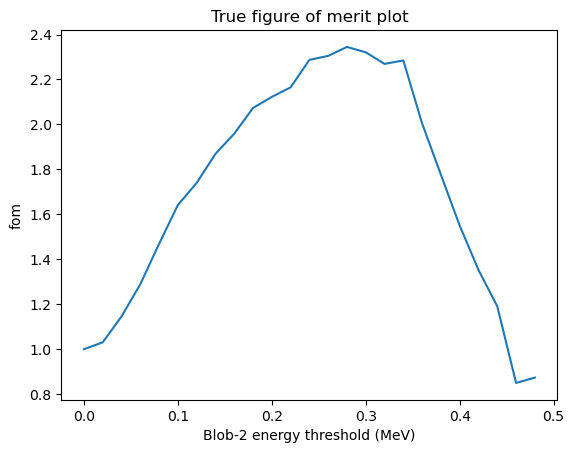

In [13]:
# plot fom
plt.plot(cut_list, fom_P1a)
plt.title("True figure of merit plot")
plt.xlabel("Blob-2 energy threshold (MeV)")
plt.ylabel("fom")
plt.show()

### It works, so now lets do it for each port

In [14]:
path = '../quick_notebooks/cut_data/'

isaura_data =   [path + '23_01_P1A_15x15x15.h5',
                path + '23_01_P1B_15x15x15.h5',
                path + '23_01_P2A_15x15x15.h5',
                path + '23_01_P2B_15x15x15.h5']
nexus_data =    [path + 'MC_23_01_P1A_15x15x15.h5',
                path + 'MC_23_01_P1B_15x15x15.h5',
                path + 'MC_23_01_P2A_15x15x15.h5',
                path + 'MC_23_01_P2B_15x15x15.h5']


port_label =    ['1A', '1B', '2A', '2B']

cut_list = np.linspace(0, 0.48, 25, endpoint = True)

fom_list = []

for i in range(len(isaura_data)):
    print("")
    print("Port " + port_label[i])
    fom_list.append(fom_producer(nexus_data[i], isaura_data[i], cut_list))


Port 1A
Data read successfully!
Positrons separated, applying FOM...
FOM created!

Port 1B
Data read successfully!
Positrons separated, applying FOM...
FOM created!

Port 2A
Data read successfully!
Positrons separated, applying FOM...
FOM created!

Port 2B
Data read successfully!
Positrons separated, applying FOM...
FOM created!


1A FOM maximum: 2.3449525101629067
1B FOM maximum: 2.3832458684670406
2A FOM maximum: 1.9171143119152936
2B FOM maximum: 2.1018841175619416


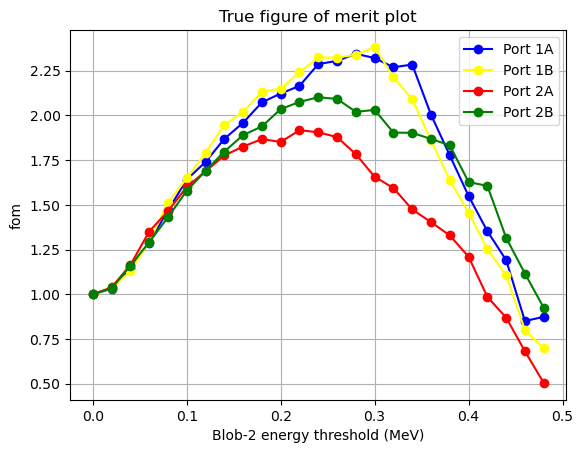

In [15]:
colours = ['blue', 'yellow', 'red', 'green']

for i in range(len(fom_list)):
    # collect port name (using convention)
    # plot fom
    plt.plot(cut_list, fom_list[i], 'o-', label = "Port " + port_label[i], color = colours[i])
    plt.title("True figure of merit plot")
    plt.xlabel("Blob-2 energy threshold (MeV)")
    plt.legend()
    
    plt.ylabel("fom")
    print(str(port_label[i]) + " FOM maximum: " + str(max(fom_list[i])))
    
plt.grid()
plt.show()

### Merge and produce new FOM

In [33]:
merged_isaura = pd.read_hdf(isaura_data[0])
merged_nexus = pd.read_hdf(nexus_data[0])

print(port_label[0])
# cant use nunique here as there duplicate event numbers
print(len(merged_isaura['event']))

for i in range(len(isaura_data)-1):    
    # unpack data
    print(port_label[i+1])
    p1_data = pd.read_hdf(isaura_data[i+1])
    print(len(p1_data['event']))
    mc_data = pd.read_hdf(nexus_data[i+1])

    merged_isaura = merged_isaura.append(p1_data, ignore_index=True)
    merged_nexus = merged_nexus.append(mc_data, ignore_index=True)

    print(len(merged_isaura['event']))




1A
2485
1B
2342
4827
2A
1638
6465
2B
2118
8583


In [35]:
# save data
merged_isaura.to_hdf('merged_ports_data/23_01_15x15x15.h5', key = 'cut', mode = 'w')
merged_nexus.to_hdf('merged_ports_data/MC_23_01_15x15x15.h5', key = 'cut', mode = 'w')

### Lets pray that we can just apply our normal FOM system to this data

In [36]:
fom_all_ports = fom_producer('merged_ports_data/MC_23_01_15x15x15.h5', 'merged_ports_data/23_01_15x15x15.h5', cut_list)

Data read successfully!
Positrons separated, applying FOM...
FOM created!


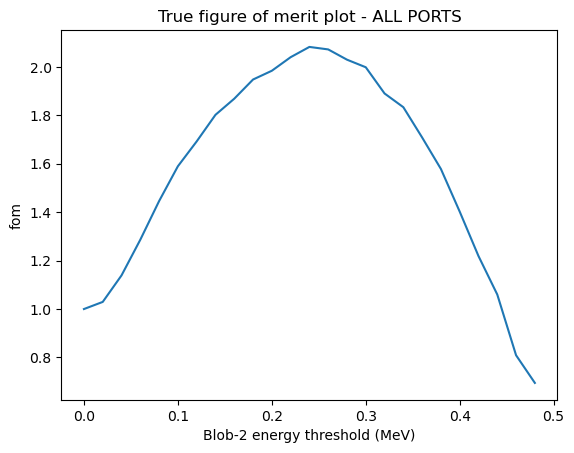

In [37]:
# plot fom
plt.plot(cut_list, fom_all_ports)
plt.title("True figure of merit plot - ALL PORTS")
plt.xlabel("Blob-2 energy threshold (MeV)")
plt.ylabel("fom")
plt.show()

### Now we do the same for fitting.

need to resurrect the old fitting functions

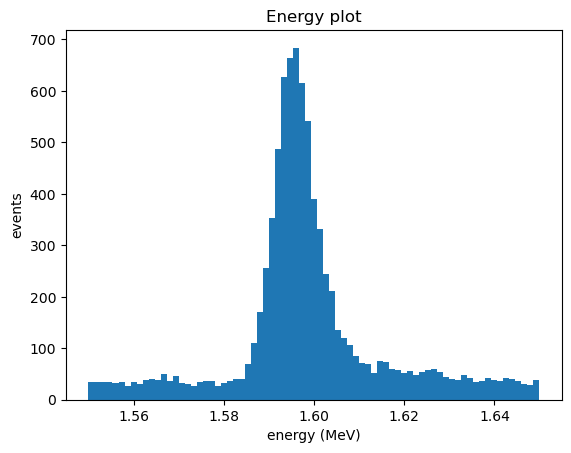

In [41]:
isa.plot_hist(merged_isaura, 'energy', binning = 75)

In [38]:
fit_fom = isa.fom_calc(merged_isaura, cut_list)

NameError: name 'gauss_bck' is not defined

<Figure size 640x480 with 0 Axes>